In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [2]:
PATH = '/content/lotto.xlsx'

df = pd.read_excel(PATH)

df.head()

,Year,Week,5_hit,4_hit,3_hit,2_hit,Num_1,Num_2,Num_3,Num_4,Num_5
0,2024,27,0,21,1730,50757,37,41,66,79,87
1,2024,26,0,46,2982,77101,7,12,35,59,78
2,2024,25,0,17,1751,56260,36,51,57,72,89
3,2024,24,0,33,1399,43565,44,85,86,87,88
4,2024,23,0,24,2155,61772,19,41,60,77,81


In [3]:
data = df

data = df.drop(['Num_1',	'Num_2',	'Num_3',	'Num_4', 'Num_5'], axis=1)

data.head()

,Year,Week,5_hit,4_hit,3_hit,2_hit
0,2024,27,0,21,1730,50757
1,2024,26,0,46,2982,77101
2,2024,25,0,17,1751,56260
3,2024,24,0,33,1399,43565
4,2024,23,0,24,2155,61772


In [4]:
target = df

target = df.drop(['Year', 'Week', '5_hit', '4_hit', '3_hit', '2_hit'], axis=1)

target

,Num_1,Num_2,Num_3,Num_4,Num_5
0,37,41,66,79,87
1,7,12,35,59,78
2,36,51,57,72,89
3,44,85,86,87,88
4,19,41,60,77,81
...,...,...,...,...,...
3509,26,33,38,47,53
3510,7,9,19,42,66
3511,8,12,24,26,85
3512,1,49,64,67,71


In [5]:
df.corr()

,Year,Week,5_hit,4_hit,3_hit,2_hit,Num_1,Num_2,Num_3,Num_4,Num_5
Year,1.000000,-0.017441,0.180486,0.593300,0.676151,0.707796,-0.017854,-0.015016,-0.026559,-0.019807,-0.029207
Week,-0.017441,1.000000,-0.009683,0.006157,-0.003215,-0.000880,-0.007987,-0.008020,-0.009838,0.010215,0.020423
5_hit,0.180486,-0.009683,1.000000,0.346362,0.300071,0.265419,-0.043664,-0.059834,-0.070899,-0.056270,-0.064235
4_hit,0.593300,0.006157,0.346362,1.000000,0.944459,0.888317,-0.117165,-0.157702,-0.162918,-0.133141,-0.118707
3_hit,0.676151,-0.003215,0.300071,0.944459,1.000000,0.982573,-0.108365,-0.140872,-0.148353,-0.122483,-0.114571
2_hit,0.707796,-0.000880,0.265419,0.888317,0.982573,1.000000,-0.081727,-0.107732,-0.110616,-0.089014,-0.091210
Num_1,-0.017854,-0.007987,-0.043664,-0.117165,-0.108365,-0.081727,1.000000,0.642725,0.439890,0.320168,0.207559
Num_2,-0.015016,-0.008020,-0.059834,-0.157702,-0.140872,-0.107732,0.642725,1.000000,0.685109,0.497302,0.313638
Num_3,-0.026559,-0.009838,-0.070899,-0.162918,-0.148353,-0.110616,0.439890,0.685109,1.000000,0.713128,0.443167
Num_4,-0.019807,0.010215,-0.056270,-0.133141,-0.122483,-0.089014,0.320168,0.497302,0.713128,1.000000,0.625686


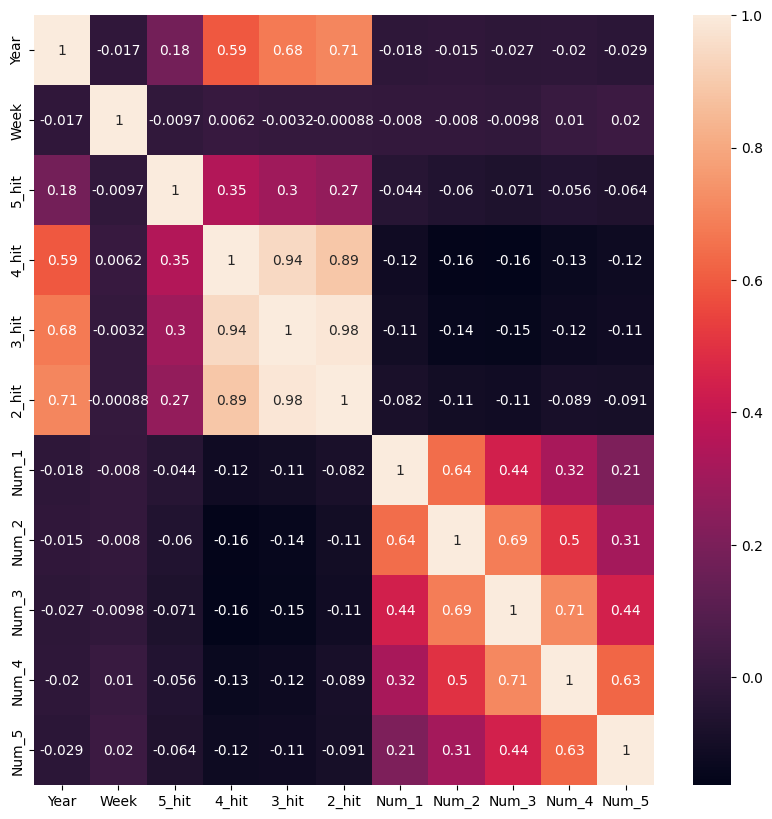

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2811, 6), (703, 6), (2811, 5), (703, 5))

In [8]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='linear'))

In [9]:
model.compile(
    optimizer='Adam',
    loss='mean_squared_error',
    metrics=['accuracy']
)

In [10]:
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))

Epoch 1/50
282/282 [==============================] - 6s 9ms/step - loss: 168908.5000 - accuracy: 0.6820 - val_loss: 14287.1191 - val_accuracy: 0.5633
Epoch 2/50
282/282 [==============================] - 1s 3ms/step - loss: 36342.3789 - accuracy: 0.6798 - val_loss: 11433.0459 - val_accuracy: 0.6728
Epoch 3/50
282/282 [==============================] - 1s 3ms/step - loss: 40504.4414 - accuracy: 0.6617 - val_loss: 28039.3477 - val_accuracy: 0.5633
Epoch 4/50
282/282 [==============================] - 1s 3ms/step - loss: 5495.5806 - accuracy: 0.7894 - val_loss: 1099.4524 - val_accuracy: 0.9986
Epoch 5/50
282/282 [==============================] - 1s 3ms/step - loss: 42532.8398 - accuracy: 0.7079 - val_loss: 3520.2710 - val_accuracy: 0.9630
Epoch 6/50
282/282 [==============================] - 1s 3ms/step - loss: 2951.1870 - accuracy: 0.7997 - val_loss: 1422.0708 - val_accuracy: 0.5633
Epoch 7/50
282/282 [==============================] - 1s 3ms/step - loss: 2344.2883 - accuracy: 0.7823 -

In [11]:
predictions = model.predict(X_test)
predictions

22/22 [==============================] - 0s 2ms/step


array([[12.793905 , 23.238312 , 40.15875  , 55.92758  , 72.295845 ],
       [ 4.5227623, 18.228573 , 32.820164 , 43.068153 , 58.933994 ],
       [ 4.972538 , 20.354437 , 36.56684  , 47.833923 , 65.56986  ],
       ...,
       [13.271705 , 23.523434 , 40.365192 , 57.20504  , 73.49535  ],
       [13.253366 , 23.488533 , 40.30514  , 57.124    , 73.388916 ],
       [ 3.9135396, 15.348936 , 27.744987 , 36.61259  , 49.945244 ]],
      dtype=float32)

In [12]:
predicted_numbers = model.predict(X_test)

random_predictions = np.array([[random.randint(1, 90) for _ in range(5)] for _ in range(len(y_test))])

results = []

for i in range(len(y_test)):
    actual = y_test.iloc[i]
    predicted = np.round(predicted_numbers[i]).astype(int)
    random_pred = random_predictions[i]

    actual_set = set(actual)
    predicted_set = set(predicted)
    random_set = set(random_pred)

    correct_predicted = len(actual_set & predicted_set)
    correct_random = len(actual_set & random_set)

    results.append({
        "actual": actual,
        "predicted": predicted,
        "random": random_pred,
        "correct_predicted": correct_predicted,
        "correct_random": correct_random
    })

for result in results[:900]:
    print(f"Actual:")
    print(f"{result['actual']}")
    print(f"Predicted: {result['predicted']}, Correct: {result['correct_predicted']}")
    print(f"Random: {result['random']}, Correct: {result['correct_random']}")
    print()

Streaming output truncated to the last 5000 lines.
Actual:
Num_1    22
Num_2    28
Num_3    38
Num_4    42
Num_5    76
Name: 1427, dtype: int64
Predicted: [13 23 41 56 73], Correct: 0
Random: [57 42  6 46 14], Correct: 1

Actual:
Num_1    28
Num_2    48
Num_3    57
Num_4    66
Num_5    73
Name: 3288, dtype: int64
Predicted: [13 23 40 56 72], Correct: 0
Random: [50 30 56 15 40], Correct: 0

Actual:
Num_1    11
Num_2    30
Num_3    36
Num_4    67
Num_5    83
Name: 270, dtype: int64
Predicted: [ 5 20 35 46 64], Correct: 0
Random: [87 21 33 39 49], Correct: 0

Actual:
Num_1    23
Num_2    29
Num_3    56
Num_4    67
Num_5    69
Name: 2268, dtype: int64
Predicted: [13 23 40 55 72], Correct: 1
Random: [40 67 19 46 45], Correct: 1

Actual:
Num_1     9
Num_2    24
Num_3    42
Num_4    57
Num_5    69
Name: 1691, dtype: int64
Predicted: [13 23 41 56 72], Correct: 0
Random: [28 28 25 20 24], Correct: 1

Actual:
Num_1    40
Num_2    54
Num_3    73
Num_4    81
Num_5    85
Name: 693, dtype: int64
Pre

In [15]:
for result in results:
    if result['correct_predicted'] >= 3 or result['correct_random'] >= 3:
        print("Actual:")
        for num in result['actual']:
          print(f"{result['actual']}")
          print(f"Predicted: {result['predicted']}, Correct: {result['correct_predicted']}")
          print(f"Random: {result['random']}, Correct: {result['correct_random']}")
          print()

Actual:
Num_1    11
Num_2    13
Num_3    40
Num_4    55
Num_5    56
Name: 2829, dtype: int64
Predicted: [13 23 40 56 72], Correct: 3
Random: [41 85 59 77 72], Correct: 0

Num_1    11
Num_2    13
Num_3    40
Num_4    55
Num_5    56
Name: 2829, dtype: int64
Predicted: [13 23 40 56 72], Correct: 3
Random: [41 85 59 77 72], Correct: 0

Num_1    11
Num_2    13
Num_3    40
Num_4    55
Num_5    56
Name: 2829, dtype: int64
Predicted: [13 23 40 56 72], Correct: 3
Random: [41 85 59 77 72], Correct: 0

Num_1    11
Num_2    13
Num_3    40
Num_4    55
Num_5    56
Name: 2829, dtype: int64
Predicted: [13 23 40 56 72], Correct: 3
Random: [41 85 59 77 72], Correct: 0

Num_1    11
Num_2    13
Num_3    40
Num_4    55
Num_5    56
Name: 2829, dtype: int64
Predicted: [13 23 40 56 72], Correct: 3
Random: [41 85 59 77 72], Correct: 0

Actual:
Num_1     3
Num_2    17
Num_3    20
Num_4    37
Num_5    40
Name: 1123, dtype: int64
Predicted: [ 3 11 20 27 37], Correct: 3
Random: [42 37 76 87 14], Correct: 1

Num_1 